## Required Acknowledgment of Academic Integrity

Students must explicitly confirm to work on the homework individually without plagiarizing. **This mandatory confirmation is facilitated through a [digital form accessible on ISIS (link)](https://isis.tu-berlin.de/mod/choice/view.php?id=1702855):**

Failure to comply with and explicitly acknowledge these guidelines will result in the nullification of the student's examination results. Students are only required to submit this affirmation once per semester.

## Feedback

Students can submit feedback for the course [via ISIS (link)](https://isis.tu-berlin.de/mod/feedback/view.php?id=1702849).

## Before you start working on the exercise

- Use Python version 3.9 and above.
- Make sure that no assertions fail or exceptions occur, otherwise points will be subtracted.
- Use all the variables given to a function unless explicitly stated otherwise. If you are not using a variable you are doing something wrong.
- Read the **whole** task description before starting with your solution.
- After you submit the notebook more tests will be run on your code. The fact that no assertions fail on your computer locally does not guarantee that you completed the exercise correctly.
- Please submit only the notebook file with its original name. If you do not submit an `ipynb` file you will fail the exercise.
- Edit only between YOUR CODE HERE.
- Verify that no syntax errors are present in the file.
- Before uploading your submission, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel\Restart) and then run all cells (in the menubar, select Cell\Run All).

In [1]:
import sys

if (3, 9) <= sys.version_info[:2] <= (3, 11):
    print("Correct Python version")
else:
    print(
        f"You are using a wrong version of Python: {'.'.join(map(str,sys.version_info[:3]))}"
    )

Correct Python version


# Exercise Sheet 3: Advanced Numpy

In the third exercise sheet we will work on advanced numpy topics and application on machine learning tasks. You will implement a complete data science pipline, starting with data loading, plotting and data exploration, and finally implementing a machine learning model and applying it on the data.

For technical reasons the following functions are **banned** throughout the notebook.

- `map`
- `sum` (`np.sum` is allowed)
- `filter`
- `np.vectorize`
- `np.fromiter`
- `np.fromfunction`
- `np.apply_along_axis`

If you use one of these functions in your submissions it will **automatically fail**.

In [2]:
# EXECUTE the setup cell !
from pathlib import Path
from unittest import TestCase

t = TestCase()

from minified import max_allowed_loops, no_imports
from illegal import IllegalContext, create_no_loop_illegals


### Exercise 1.1: ( 8 points ) 

Read the data from the file data.csv and save it in a dictionary. The letters in data.csv are the assigned labels and their corresponding datapoints. Each datapoint is two-dimensional and consists of the given x- and y-values. Return a dictionary with the letters/labels as keys. The value assigned to each key should be a list of x- and y-values. 

* Do not forget to cast the vaules to float.

In [3]:
@no_imports
@max_allowed_loops(1)
def read_from_file(file="data.csv"):
    """
    Opens a csv file and parses it line by line. Each line consists of a label and two
    data dimensions. The function returns a dictionary where each key is a label and
    the value is a list of all the datapoints that have that label. Each datapoint
    is represented by a pair (2-element tuple) of floats.

    Args:
        file: The path to the file to open and parse. Defaults to
        "data.csv".

    Returns:
        The parsed contents of the csv file
    """
    # YOUR CODE HERE
    with open(file,"r") as data:
        D = {}
        for i in data:
            if i:
                l,x,y = i.split(",")
                if not str(l) in D:
                    D[str(l)] = []
            D[str(l)].append((float(x),float(y)))
        print(f"D is {D}")
    # YOUR CODE HERE
    
    return D

In [4]:
tiny_result = read_from_file(file="tiny.csv")
print("tiny_result", tiny_result)
tiny_expected = {"A": [(0.8, 0.9), (0.2, 0.3)], "B": [(0.9, 0.1)], "C": [(2.0, 4.0)]}
t.assertEqual(tiny_result, tiny_expected)

D = read_from_file(file="data.csv")
print(f"Keys of D: {D.keys()}", end="\n\n")
for k, v in D.items():
    print(f"{len(v)} datapoints were assigned the label {k}")

# Test All types
t.assertIsInstance(D, dict)
for d in D:
    t.assertIsInstance(d, str)
    t.assertIsInstance(D[d], list)
    for el in D[d]:
        t.assertIsInstance(el, tuple)
        t.assertIsInstance(el[0], float)
        t.assertIsInstance(el[1], float)

letters = "MNU"
t.assertEqual(set(D.keys()), set(letters))
t.assertTrue(all(len(v) > 99 for v in D.values()))
read_from_file.assert_not_too_many_loops()
read_from_file.assert_no_imports()

D is {'A': [(0.8, 0.9), (0.2, 0.3)], 'B': [(0.9, 0.1)], 'C': [(2.0, 4.0)]}
tiny_result {'A': [(0.8, 0.9), (0.2, 0.3)], 'B': [(0.9, 0.1)], 'C': [(2.0, 4.0)]}
D is {'N': [(1.68, 1.213), (-0.321, -1.458), (2.636, 4.068), (1.395, 0.52), (0.38, 4.078), (4.069, 5.29), (-0.501, 0.336), (0.602, 2.601), (-0.864, 1.622), (3.167, -0.404), (1.737, 1.917), (3.405, 0.169), (1.362, -3.626), (-2.214, 0.524), (1.491, 1.174), (0.876, -1.269), (1.122, 1.617), (2.304, 1.295), (-1.308, -1.68), (-0.729, 4.233), (6.234, -1.67), (0.714, 2.631), (0.044, 1.147), (1.711, 0.108), (-1.846, 0.631), (1.905, 2.88), (-0.363, 3.878), (0.749, -0.028), (1.435, 2.059), (0.907, -0.293), (3.522, 0.108), (4.983, 1.601), (2.481, 2.269), (0.611, 1.987), (-1.565, -0.895), (4.147, 5.048), (-0.134, 1.032), (1.098, 0.956), (2.819, 2.909), (1.001, 0.105), (-3.096, 3.287), (2.53, 0.067), (0.102, 0.419), (-1.386, 0.146), (1.997, -0.346), (3.062, -1.083), (0.78, 1.035), (0.11, 0.648), (-0.584, 4.829), (0.84, 1.834), (-2.68, 0.818), (2

In [5]:
# This cell is for grading

### Exercise 1.2: ( 5 Pts )

Use numpy to stack all of the $N$ datapoints from the dictionary into one matrix $X$, containing the data.

Additionally, create one array $y$ with the corresponding integer labels. 

Each datapoint $x_i \in X, \> i = \overline{1..N}$ is of dimension $D=2$. The label assigned to a datapoint has to be a positive integer. Every letter-label should map to one integer-label in $y$ accordingly.

Maping example: $A \rightarrow 0,\> C \rightarrow 1,\> K \rightarrow 2, ...$ (The order of the keys/labels defines the numeric label. The first key is mapped to 0 and so on.)

* Dataset $X$: $$\Large X \in \mathbb{R}^{(N, D)}$$
* Labels $y$: $$\Large y \in \mathbb{N}^{(N,)} $$

In [6]:
import numpy as np

illegals = create_no_loop_illegals(np, __builtins__)
no_loop_illegals_context = IllegalContext(illegals, globals())

In [7]:
@no_imports
@max_allowed_loops(1)
def stack_data(D):
    """
    Convert a dictionary dataset into a two arrays of data and labels. The dictionary
    keys represent the labels and the value mapped to each key is a list that
    contains all the datapoints belonging to that label. The output are two arrays
    the first is the datapoints in a single 2d array and a vector of integers
    with the corresponding label for each datapoint. The order of the datapoints is
    preserved according to the order in the dictionary and the lists.

    The labels are converted from a string to a unique int.

    The datapoints are entered in the same order as the keys in the `D`. First
    all the datapoints of the first key are entered then the second and so on.
    Within one label order also remains.

    Args:
        D: The dictionary that should be stacked.

    Returns:
        The two output arrays. The first is a float-matrix containing all the
        datapoints. The second is an int-vector containing the labels for each datapoint.
    """

    # YOUR CODE HERE
    X_lst = []
    y_len_lst = []
    y_indices = []
    for n,i in enumerate(list(D.items())):
        line = list(i)
        X_lst += line[1]
        y_len_lst.append(len(line[1]))
        y_indices.append(int(n))
            
    X = np.array(X_lst)
    y = np.repeat(np.array(y_indices, dtype=np.int64),y_len_lst)
    


    # YOUR CODE HERE
    
    return X, y

In [8]:
tiny_expected_X, tiny_expected_y = (
    np.array(
        [
            [0.0, 0.1],
            [0.9, 0.7],
            [0.8, 0.3],
        ]
    ),
    np.array([0, 1, 1]),
)
tiny_result_X, tiny_result_y = stack_data(
    {"B": [(0.0, 0.1)], "A": [(0.9, 0.7), (0.8, 0.3)]}
)
print(tiny_result_X, tiny_result_y)
np.testing.assert_allclose(tiny_expected_X, tiny_result_X)
np.testing.assert_allclose(tiny_expected_y, tiny_result_y)

X, y = stack_data(D)
print(X.shape, y.shape)
print(X.dtype, y.dtype)

expected_len = sum(len(x) for x in D.values())
print(f"Expected length for X, y: {expected_len}")

t.assertEqual(X.shape, (expected_len, 2))
t.assertEqual(y.shape, (expected_len,))

t.assertEqual(X.dtype, np.float64)
t.assertEqual(y.dtype, np.int64)

t.assertEqual(set(y), set(range(len(D))))

with no_loop_illegals_context:
    X, y = stack_data(D)

stack_data.assert_not_too_many_loops()
stack_data.assert_no_imports()

[[0.  0.1]
 [0.9 0.7]
 [0.8 0.3]] [0 1 1]
(455, 2) (455,)
float64 int64
Expected length for X, y: 455


In [9]:
# This cell is for grading

### Exercise 1.3: ( 4 Pts )

Write a function that returns a list of all $k$ clusters $C$. A cluster $C_k$ is composed of every datapoint $X_i$ assigned with the label $k$. There are as many clusters $C_k$ as there are unique labels in $y$.


$$\Large{\mathcal{C} = \{ C_1, C_2, \cdots, C_k \},\quad k = \overline{1..K}}$$

<br>

$$\Large C_k \in \mathbb{R}^{(N_k, D)}$$

In [57]:
@no_imports
@max_allowed_loops(1)
def get_clusters(X, y):
    """
    Receives a labeled dataset and splits the datapoints according to label

    Args:
        X: The dataset
        y: The label for each point in the dataset

    Returns:
        A list of arrays where the elements of each array are datapoints belonging to
        the label at that index.

    Example:
    >>> get_clusters(
            np.array([[0.8, 0.7], [0, 0.4], [0.3, 0.1]]),
            np.array([0,1,0])
        )
    >>> [array([[0.8, 0.7],[0.3, 0.1]]),
         array([[0. , 0.4]])]
    """
    # YOUR CODE HERE

    
    out = []
    found_indices = []
    for i in list(y):
        if not i in found_indices:
            filter_arr = np.array([i])
            mask = np.isin(y,filter_arr)
            filtered_array = X[mask]
            out.append(filtered_array)
            found_indices.append(i)
        
         
    return out
    # YOUR CODE HERE
    

In [58]:
tiny_result = get_clusters(
    np.array(
        [
            [0.8, 0.7],
            [0, 0.4],
            [0.3, 0.1],
        ]
    ),
    np.array([0, 1, 0]),
)
print(tiny_result)
tiny_expected = [
    np.array(
        [
            [0.8, 0.7],
            [0.3, 0.1],
        ]
    ),
    np.array(
        [
            [0.0, 0.4],
        ]
    ),
]
for r, e in zip(tiny_result, tiny_expected):
    np.testing.assert_allclose(r, e)

clusters = get_clusters(X, y)
# output is list
t.assertIsInstance(clusters, list)
t.assertEqual(len(letters), len(clusters))

# all elements are arrays
for el in clusters:
    t.assertIsInstance(el, np.ndarray)

t.assertEqual(sum(map(len, clusters)), len(X))

with no_loop_illegals_context:
    clusters = get_clusters(X, y)


get_clusters.assert_not_too_many_loops()
get_clusters.assert_no_imports()

[array([[0.8, 0.7],
       [0.3, 0.1]]), array([[0. , 0.4]])]


In [48]:
# This cell is for grading

### Exercise 1.4: ( 8 Pts )

Split the data $X$ into training and test data.

* Return a list of clusters for training and a list of cluster for testing.

* Utilize the function `train_test_idxs` from utils to split the data.

* The train-test ratio should be 80-20

* Use the function implemented in Exercise 1.3 __get_clusters(X,y)__ to get the clusters.

* Remember that when you split the dataset you need to keep the relationship between the data and the labels. Do not split the data and labels independently

In [60]:
from utils import train_test_idxs

print("train_test_idxs specification:\n", train_test_idxs.__doc__)

train_indices, test_indices = train_test_idxs(L=20, test_ratio=0.3)
print(f"train_indices = {train_indices}")
print(f"test_indices = {test_indices}")

train_test_idxs specification:
 
    Returns indices that can be used as train and test data.

    Args:
        L (int): The size of the dataset
        test_ratio (float): The ratio [0-1] of indices that should be put in the test
        set

    Returns:
        Tuple[np.ndarray, np.ndarray]: The training and testset indices
    
train_indices = [11  3  0 12  2  5  1 18 10 17 19  7 13  8]
test_indices = [16 14 15  9  4  6]


In [73]:
@no_imports
@max_allowed_loops(0)
def split(X, y):
    """
    Split the data into train and test sets. The training and test set are
    clustered by label using `get_clusters`. The size of the training set
    is 80% of the whole dataset

    Args:
        X: The dataset (2d)
        y: The label of each datapoint in the dataset `X` (1d)

    Returns:
        The clustered training and testset
    """
    # YOUR CODE HERE
    indices = train_test_idxs(len(y),0.2)
    test = (X[indices[1]],y[indices[1]])
    train = (X[indices[0]],y[indices[0]])

    tr_clusters = get_clusters(train[0],train[1])
    te_clusters = get_clusters(test[0],test[1])
    # YOUR CODE HERE
    

    return tr_clusters, te_clusters

In [74]:
output = split(X, y)
tr_clusters, te_clusters = output
t.assertIsInstance(output, tuple)
t.assertIsInstance(tr_clusters, list)
t.assertIsInstance(te_clusters, list)


t.assertEqual(len(tr_clusters), len(te_clusters))
t.assertEqual(len(tr_clusters), len(letters))
t.assertEqual(len(te_clusters), len(letters))

for el in tr_clusters + te_clusters:
    t.assertIsInstance(el, np.ndarray)


n_in_train = sum(map(len, tr_clusters))
n_in_test = sum(map(len, te_clusters))
t.assertEqual(n_in_train + n_in_test, len(X))

percent_train = n_in_train / len(X)
print(f"percent_train = {percent_train}")
t.assertGreaterEqual(percent_train, 0.79)
t.assertLessEqual(percent_train, 0.81)


percent_train = 0.8


In [ ]:
# This cell is for grading

### Exercise 1.5:  (9 Pts )

Compute the mean $\mu_k$ of each cluster $C_k$. Return a list of all cluster means $\mu$.


$$\Large{\mu = \{ \mu_1, \mu_2, \cdots, \mu_k \},\quad k = \overline{1..K}}$$



* Number of elements in a cluster $k$:
$$\Large{N_k = | C_k |, \quad C_k \in \mathbb{R}^{(N_k, D)}}$$



* The $k$-th cluster mean $\mu_k$:
$$\Large{ \mu_k = \frac{1}{N_k}\sum_{x_i \in C_k} x_i }$$

In [111]:
@no_imports
@max_allowed_loops(1)
def calc_means(clusters):
    """
    For a collections of clusters calculate the mean for each cluster

    Args:
        clusters: A list of 2d arrays. Each array in the list corresponds to a cluster.

    Returns:
        A matrix where each row represents the mean of a cluster.
    """
    # YOUR CODE HERE
    means = np.zeros((len(clusters),2))
    for i,c in enumerate(clusters):
        mean = np.sum(c,axis=0)/c.shape[-2]
        means[i] = mean

    return(means)
    # YOUR CODE HERE
    

In [114]:
tiny_clusters = [
    np.array([[0.2, 0.3], [0.1, 0.2]]),
    np.array([[0.8, 0.9], [0.7, 0.5], [0.6, 0.7]]),
]
tiny_result = calc_means(tiny_clusters)
print(tiny_result, end="\n\n")
tiny_expected = np.array([[0.15, 0.25], [0.7, 0.7]])
np.testing.assert_allclose(tiny_result, tiny_expected)

means = calc_means(tr_clusters)
print(means)
t.assertIsInstance(means, np.ndarray)
t.assertEqual(means.shape, (len(letters), 2))


[[0.15 0.25]
 [0.7  0.7 ]]

[[ 1.013032    1.475472  ]
 [ 7.20163889  6.86493519]
 [-0.74180153 -0.82074809]]


In [115]:
# This cell is for grading

### Exercise 2.1: Scatter plot of clusters ( 10 points )

- Create a scatter plot of size 8x8. 

- Plot each datapoint of a cluster $x_{ik} \in  C_k$ as dots with an alpha value of 0.6 and a label. 

- The plot-label should contain both the cluster's letter-label as well as its integer-label. 

- Further, plot the cluster's mean $\mu_k$ as a red cross of size 7. The plot should also have a label for each cluster's mean, giving information on its exact coordinates. 

- The title of the plot should be _'Scatter plot of the clusters'_ in fontsize 20.

* Label for the scatter plots example: _A = 0_
* Label for the cluster means example (use LaTeX): _$\mu_A:$[1.23  0.56]_

- If the mean of each cluster is not provided, use `calc_means(clusters)` to calculate the means.

In [118]:
import matplotlib.pyplot as plt

%matplotlib inline

In [219]:
@no_imports
def plot_scatter_and_mean(clusters, letters, means=None) -> None:
    """
    Create a scatter plot visualizing each cluster and its mean

    Args:
        clusters: A list containing arrrays representing
        each cluster
        letters: The "name" of each cluster
        means: The mean of each cluster. If not
        provided (i.e. `means` is `None`) the mean of each cluster in `clusters` should be calculated and
        used
    """
    assert len(letters) == len(clusters)

    # YOUR CODE HERE
    if means is None:
        means = calc_means(clusters)
        print(means)
  
    x = np.concatenate([c[:,0] for c in clusters])
    y = np.concatenate([c[:,1] for c in clusters])
    #print(x)
    plt.figure(figsize=(8,8))
    plt.plot(x,y,".",alpha=0.6)
    plt.plot(means[:,0],means[:,1],"xr",markersize=7)
    print(letters)

    plt.xlabel(str([f"{l} = {i}" for i,l in enumerate(letters)]))
    plt.title("Scatter plot of the clusters", fontsize=20)
    for m in means:
        plt.text(m[0], m[1], f' $\mu_A:$[{m[0]:.2f} {m[1]:.2f}]')
    plt.show()
    # YOUR CODE HERE
    

[[ 1.013032    1.475472  ]
 [ 7.20163889  6.86493519]
 [-0.74180153 -0.82074809]]
MNU


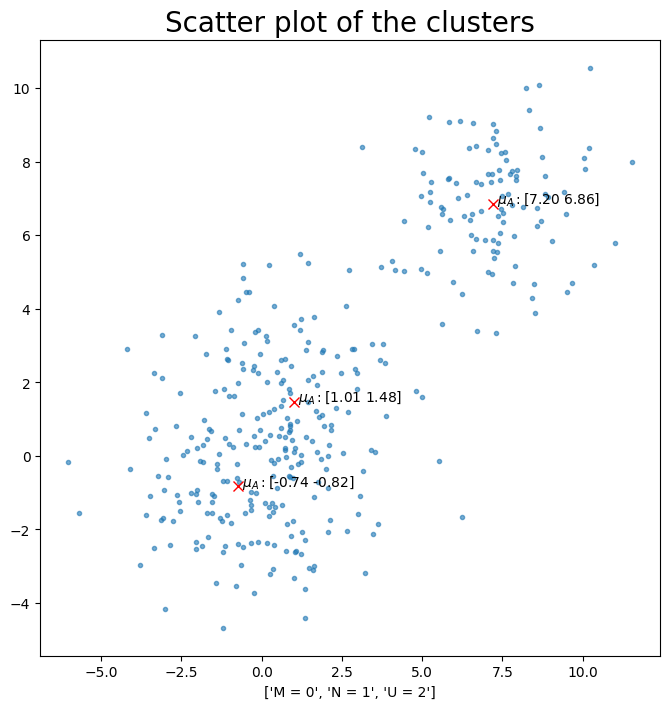

In [220]:
plot_scatter_and_mean(tr_clusters, letters, means=None)

### Exercise 2.2: (10 points)

 - To make it easier to visually analyse the the differences between clusters, the data can be projected onto an axis. Plot a histrogram for the projection onto the given axis. 
 
 - The histogram should have 30 bins, be 50% transparent and labeled. The area under the histogram should be normalized and sum to 1 to represent a proper distribution. It can be done by setting the corresponding parameter.  - The bars width should have 4/5 of the bins width.


- Create a histogram of size 14x5.
* Plot the mean of each cluster as a vertical, dashed, red line.
* Label for the histograms example: _A_
* The title of the plot should be dynamic, have a font size of 20 and explain the axis of the projection, e.g. "Projection to axis 0 histogramm plot" or "Projection to axis 1 histogramm plot", depending on the axis.

In [265]:
@no_imports
def plot_projection(clusters, letters, means, axis=0):
    """
    Plot a histogram of the dimension provided in `axis`

    Args:
        clusters: The clusters from which to create the historgram
        letters: The string representation of each class
        means: The mean of each class
        axis: The axis from which to create the historgram. Defaults to 0.
    """
    # YOUR CODE HERE
    
    x = np.concatenate(clusters,axis=0)
    plt.figure(figsize=(14,5))
    histo = plt.hist(x[:,axis],bins=30,rwidth=0.8,color="b",alpha=0.5,density=True)
    print(means)
    for i in means:
        plt.axvline(i[axis],color="r",linestyle="--")

    # YOUR CODE HERE
    

[[ 1.013032    1.475472  ]
 [ 7.20163889  6.86493519]
 [-0.74180153 -0.82074809]]


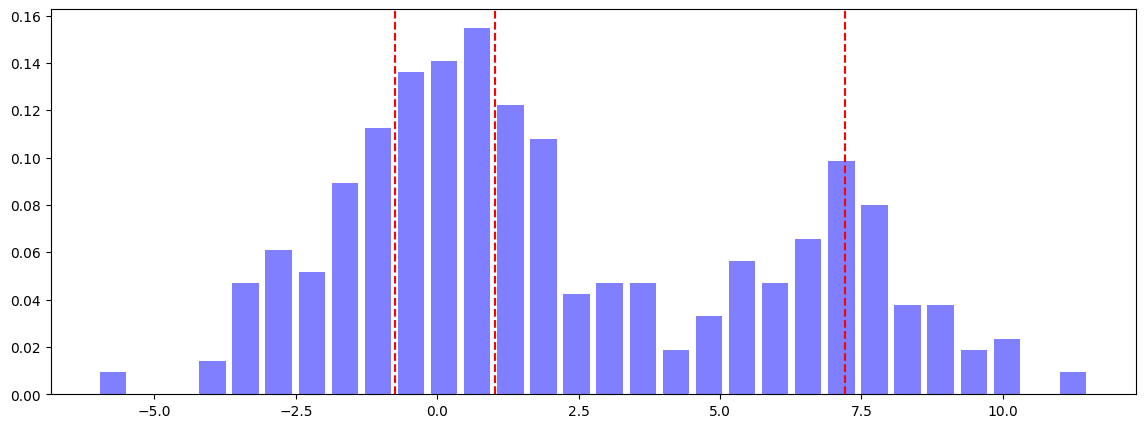

In [266]:
plot_projection(tr_clusters, letters, means, axis=0)

<### Exercise 3.1: (10 points)

Compute the within cluster covariance $S_w$ to further analyse the distribution of the data in the clusters. Sum up the covariance matrices of each cluster to get the one average within cluster corvariance matrix. **This is shown in the formula below.** Covariance matrices describe the relationship between the x and y dimensions of the data.

$$\boxed{\Large{S_w  = \sum_{k=1}^K \sum_{x_i \in C_k} (x_i - \mu_k)^{\top}} (x_i - \mu_k), \quad S_w \in \mathbb{R}^{(D, D)}}$$


* Reminder: Data $C$ is a set of clusters $C_k$, where $K$ is the total number of clusters. $${\mathcal{C} = \{ C_1, C_2, \cdots, C_k \},\quad k = \overline{1..K}}$$

* Number of elements in a cluster $k$: $${N_k = | C_k |, \quad C_k \in \mathbb{R}^{(N_k, D)}}$$
<br>

* $k$-th cluster mean $\mu_k$: $${ \mu_k = \frac{1}{N_k}\sum_{x_i \in C_k} x_i }$$

In [ ]:
@no_imports
@max_allowed_loops(1)
def within_cluster_cov(clusters):
    """
    Calculate the within class covariance for a collection of clusters

    Args:
        clusters: A list of clusters each consisting of
        an array of datapoints

    Returns:
        The within cluster covariance

    Example:
        >>> within_cluster_cov(
            [array([[0.2, 0.3], [0.1, 0.2]]), array([[0.8, 0.9], [0.7, 0.5], [0.6, 0.7]])]
        )
        >>> array([[0.025, 0.025],
                   [0.025, 0.085]])
    """
    d = clusters[0].shape[1]
    S_w = np.zeros((d, d))
    # YOUR CODE HERE
    raise NotImplementedError("Replace this line with your code")
    # YOUR CODE HERE
    

In [ ]:
tiny_clusters = [
    np.array([[0.2, 0.3], [0.1, 0.2]]),
    np.array([[0.8, 0.9], [0.7, 0.5], [0.6, 0.7]]),
]
tiny_expected = np.array([[0.025, 0.025], [0.025, 0.085]])
tiny_result = within_cluster_cov(tiny_clusters)
print(tiny_result)
np.testing.assert_allclose(tiny_expected, tiny_result)

S_w = within_cluster_cov(tr_clusters)
print(S_w)
t.assertIsInstance(S_w, np.ndarray)
t.assertEqual(S_w.shape, (2, 2))

# check if symmetric
np.testing.assert_allclose(S_w, S_w.T)


In [ ]:
# This cell is for grading

### Exercise 3.2: ( 5 + 10 points )

To compute the between cluster covariance, the calculation of the mean of means is necessary. In the function `calc_mean_of_means(clusters)` you must reuse your function `calc_means(clusters)`.


* Mean of means: $$\Large{ \mu = \frac{1}{N}\sum_{C_i \in \mathcal{C}}{C_i}},\quad \text{where}\quad N = |\mathcal{C}|$$


The between cluster covariance describes the relation of the datapoints from one cluster to the other. It focuses on the differences rather then the similarities. **You only have to implement the given formulas**, and do not need to fully understand the underlying concept. 

* Between cluster covariance: $$\boxed{\Large{S_b = \sum_{k=1}^K  N_k (\mu_k - \mu) (\mu_k - \mu)^{\top}}}$$

where $\mu$ represents the mean of means and $\mu_k$ represents the mean of the $k$-th cluster.

*Hint:* For the `between_cluster_cov` consider the `np.outer` function

In [ ]:
@no_imports
@max_allowed_loops(0)
def calc_mean_of_means(clusters):
    """
    Given a collection of datapoints divided in clusters, calculate the
    mean of all cluster means.
    
    Args:
        clusters: A list of clusters represented in arrays

    Returns:
        A single datapoint that represents the mean of all the
        cluster means
    """
    # YOUR CODE HERE
    raise NotImplementedError("Replace this line with your code")
    # YOUR CODE HERE
    

In [ ]:
tiny_result = calc_mean_of_means(
    [
        np.array([[0.222, 0.333], [0.1, 0.2]]),
        np.array([[0.8, 0.9], [0.7, 0.5], [0.6, 0.7]]),
    ]
)
print(tiny_result)
tiny_expected = np.array([0.4305, 0.48325])
np.testing.assert_allclose(tiny_expected, tiny_result)

mean_of_means = calc_mean_of_means(tr_clusters)
print(mean_of_means)
t.assertIsInstance(mean_of_means, np.ndarray)
t.assertEqual(mean_of_means.shape, (2,))


In [ ]:
# This cell is for grading

In [ ]:
@no_imports
@max_allowed_loops(1)
def between_cluster_cov(
    clusters,
    cluster_means,
    mean_of_means,
):
    """
    Calculate the covariance between clusters.

    Args:
        clusters: A list of datapoints divided by cluster
        cluster_means: A list of vectors representing the mean
        of each cluster
        mean_of_means: A vector, the mean of all datapoints

    Returns:
        Covariance between clusters
    """
    d = clusters[0].shape[1]
    S_b = np.zeros((d, d))

    # YOUR CODE HERE
    raise NotImplementedError("Replace this line with your code")
    # YOUR CODE HERE
    

In [ ]:
tiny_clusters = [
    np.array([[0.2, 0.3], [0.1, 0.2]]),
    np.array([[0.8, 0.9], [0.7, 0.5], [0.6, 0.7]]),
]
tiny_means = [np.array([0.15, 0.25]), np.array([0.7, 0.7])]
tiny_mean_of_means = np.array([0.425, 0.475])
between_cluster_cov(tiny_clusters, tiny_means, tiny_mean_of_means)

S_b = between_cluster_cov(tr_clusters, means, mean_of_means)
print(S_b)
t.assertIsInstance(S_b, np.ndarray)
t.assertEqual(S_b.shape, (2, 2))
np.testing.assert_allclose(S_b, S_b.T)

t.assertTrue(np.all(S_b > 3000))
t.assertTrue(np.all(S_b < 5000))



In [ ]:
# This cell is for grading

### Exercise 3.3 (15 points):

Compute rotation matrix $W$. To find the rotation matrix you first need to find a matrix $A$ so that the within cluster covariance matrix can be transformed into the between cluster covariance matrix. 

$$\Large{ S_w A = S_b}$$

Next, find the eigenvalues of this matrix $A$. The eigenvectors describe the direction in which the matrix $A$ does _not_ transform and instead only scales. These vectors form the rotation matrix, as they show the directions in which the difference between $S_w$ and $S_b$ is maximized. **Implement the given formulas!**

$$ \Large{AW = \lambda W}$$
* Return the rotation matrix and the index of its largest axis (according to the eigenvalues).

In [ ]:
@no_imports
@max_allowed_loops(0)
def rotation_matrix(S_w, S_b):
    """
    Calculate the transformation matrix given the within- and between cluster
    covariance matrices.

    Args:
        S_w: The within cluster covariance
        S_b: The between cluster covariance

    Returns:
        The transformation matrix and the axis along with the transformed data achieves
        maximal variance
    """
    # YOUR CODE HERE
    raise NotImplementedError("Replace this line with your code")
    # YOUR CODE HERE
    

In [ ]:
tiny_S_w = np.array([[0.025, 0.025], [0.025, 0.085]])
tiny_S_b = np.array([[0.378125, 0.309375], [0.309375, 0.253125]])
tiny_result_M, tiny_result_max_axis = rotation_matrix(tiny_S_w, tiny_S_b)
print(tiny_result_M, tiny_result_max_axis)
tiny_expected_M, tiny_expected_max_axis = (
    np.array([[0.99752952, -0.63323779], [-0.07024856, 0.7739573]]),
    0,
)
np.testing.assert_allclose(tiny_expected_M, tiny_result_M)
np.testing.assert_allclose(tiny_expected_max_axis, tiny_result_max_axis)

output = rotation_matrix(S_w, S_b)
t.assertIsInstance(output, tuple)
t.assertEqual(len(output), 2)
W_rot, max_axis = output
t.assertIsInstance(W_rot, np.ndarray)
t.assertIsInstance(max_axis, np.int64)
t.assertEqual(W_rot.shape, (2, 2))


In [ ]:
# This cell is for grading

### Exercise 3.4: (6  points)

Apply rotation matrix to the clusters and return the rotated clusters in a list. 

In [ ]:
@no_imports
@max_allowed_loops(1)
def rotate_clusters(W_rot, clusters):
    """
    Rotate all the datapoints in all the clusters

    Args:
        W_rot: The rotation matrix
        clusters: The list of datapoints divided in clusters that
        will be rotated

    Returns:
        The rotated datapoints divided by cluster
    """
    # YOUR CODE HERE
    raise NotImplementedError("Replace this line with your code")
    # YOUR CODE HERE
    

In [ ]:
rad = np.deg2rad(30)
c, s = np.cos(rad), np.sin(rad)
rot30 = np.array([[c, -s], [s, c]])
tiny_clusters = [
    np.array([[0.2, 0.3], [0.1, 0.2]]),
    np.array([[0.8, 0.9], [0.7, 0.5], [0.6, 0.7]]),
]
tiny_rotated_result = rotate_clusters(rot30, tiny_clusters)
print(tiny_rotated_result)
tiny_rotated_expected = [
    np.array([[0.32320508, 0.15980762], [0.18660254, 0.12320508]]),
    np.array(
        [[1.14282032, 0.37942286], [0.85621778, 0.0830127], [0.86961524, 0.30621778]]
    ),
]
for r, e in zip(tiny_rotated_result, tiny_rotated_expected):
    np.testing.assert_allclose(r, e)

rot_tr_clusters = rotate_clusters(W_rot, tr_clusters)
t.assertIsInstance(rot_tr_clusters, list)
for norm, rotated in zip(tr_clusters, rot_tr_clusters):
    t.assertIsInstance(rotated, np.ndarray)
    t.assertEqual(norm.shape, rotated.shape)


In [ ]:
# This cell is for grading

### Goal

Using the rotated clusters, we can now plot the clusters projected onto the axis with highest eigenvalue as histograms. Here we can draw a more accurate line separating the clusters than we could before. This line can be used for classifying data through drawing a simple line between clusters.

In [ ]:
plot_scatter_and_mean(rot_tr_clusters, letters)
means = calc_means(rot_tr_clusters)
plot_projection(rot_tr_clusters, letters, means, axis=max_axis)